In [7]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
from matplotlib.colors import ListedColormap
from datetime import date

%matplotlib inline

ModuleNotFoundError: No module named 'pandas_profiling'

Project data is available from following website
https://opendata-renewables.engie.com/explore/dataset/d543716b-368d-4c53-8fb1-55addbe8d3ad/information#


In [ ]:
path= 'C:\\Users\\utkar\\Downloads\\windData\\la-haute-borne-data-2013-2016.csv'
df = pd.read_csv(path, usecols = ['Wind_turbine_name', 'Date_time','P_avg','P_std','Ws_avg','Ws_std','Ot_avg','Rm_avg','Rs_avg',
           'Wa_avg','Ws1_avg','Ws1_std','Ws2_avg','Ws2_std',
           'Ya_avg', 'Yt_avg', 'Ds_avg', 'Rt_avg'], sep=';',low_memory = False)

In [144]:
df["DateTime"] = pd.to_datetime(df["Date_time"],utc=True,format='%Y-%m-%d %H:%M:%S')

In [145]:
df["DateTime"]

0        2013-01-07 00:20:00+00:00
1        2013-01-05 21:20:00+00:00
2        2013-01-06 07:30:00+00:00
3        2013-01-05 20:10:00+00:00
4        2013-01-06 10:20:00+00:00
                    ...           
840375   2016-02-21 00:10:00+00:00
840376   2014-01-04 00:20:00+00:00
840377   2014-01-03 07:30:00+00:00
840378   2016-03-19 23:50:00+00:00
840379   2014-01-03 11:50:00+00:00
Name: DateTime, Length: 840380, dtype: datetime64[ns, UTC]

In [147]:
#df['Date_time'] = pd.to_datetime(df['Date_time'])
df.sort_values(by=['Date_time'], inplace=True, ascending=True)

df["Year"] = df["DateTime"].dt.year
df["Month"] = df["DateTime"].dt.month

Ws	Wind_speed
Va2	Vane_position_2
Ot	Outdoor_temperature
Ws2	Wind_speed_2
Wa_c	Absolute_wind_direction_corrected
DCs	Generator_converter_speed
Yt	Nacelle_temperature
Na_c	Nacelle_angle_corrected
Ya	Nacelle_angle
Rm	Torque
Rs	Rotor_speed
Wa	Absolute_wind_direction
Ba	Pitch_angle
Ds	Generator_speed
Va	Vane_position
Cm	Converter_torque
Ws1	Wind_speed_1
P	Active_power
Va1	Vane_position_1
Pas	Pitch_angle_setpoint
Rt.  Hub Temperature

In [149]:
df1 = (df[["Wind_turbine_name", "DateTime","Year","Month","P_avg","P_std","Ws_avg","Ws_std","Ot_avg","Rm_avg","Rs_avg",
           "Wa_avg","Ws1_avg","Ws1_std","Ws2_avg","Ws2_std",
           "Ya_avg", "Yt_avg", "Ds_avg", "Rt_avg", 
          ]])

In [94]:
# prof = ProfileReport(df1)
# prof.to_file(output_file='output.html')

In [151]:
print(df1.isnull().sum())

Wind_turbine_name       0
DateTime                0
Year                    0
Month                   0
P_avg                4678
P_std                4678
Ws_avg               4678
Ws_std               4678
Ot_avg               4678
Rm_avg               4678
Rs_avg               4678
Wa_avg               4678
Ws1_avg              4678
Ws1_std              4678
Ws2_avg              4678
Ws2_std              4678
Ya_avg               4678
Yt_avg               4678
Ds_avg               4678
Rt_avg               4678
dtype: int64


In [152]:
df1_pf = df1[df1['P_avg'] > 0]

In [153]:
print(df1_pf.isnull().sum())

Wind_turbine_name    0
DateTime             0
Year                 0
Month                0
P_avg                0
P_std                0
Ws_avg               0
Ws_std               0
Ot_avg               0
Rm_avg               0
Rs_avg               0
Wa_avg               0
Ws1_avg              0
Ws1_std              0
Ws2_avg              0
Ws2_std              0
Ya_avg               0
Yt_avg               0
Ds_avg               0
Rt_avg               0
dtype: int64


In [163]:
df1_train = df1_pf[df1_pf['Year'] != 2016]
df1_test = df1_pf[df1_pf['Year'] == 2016]

In [154]:
corr = df1_pf.corr()
#print (corr)
corr

Year     Month     P_avg     P_std    Ws_avg    Ws_std    Ot_avg  \
Year     1.000000  0.001871  0.004674 -0.007831 -0.002952  0.007578  0.073002   
Month    0.001871  1.000000 -0.080837 -0.102632 -0.076187 -0.100585  0.251916   
P_avg    0.004674 -0.080837  1.000000  0.775220  0.973153  0.767805 -0.194766   
P_std   -0.007831 -0.102632  0.775220  1.000000  0.755698  0.873147 -0.123853   
Ws_avg  -0.002952 -0.076187  0.973153  0.755698  1.000000  0.758038 -0.144683   
Ws_std   0.007578 -0.100585  0.767805  0.873147  0.758038  1.000000 -0.094921   
Ot_avg   0.073002  0.251916 -0.194766 -0.123853 -0.144683 -0.094921  1.000000   
Rm_avg   0.004102 -0.081672  0.998075  0.769218  0.979966  0.759680 -0.202413   
Rs_avg  -0.011801 -0.063250  0.841829  0.685279  0.856134  0.580616 -0.185275   
Wa_avg   0.046280 -0.022101  0.035842  0.090452  0.050411  0.116324  0.039948   
Ws1_avg  0.016953 -0.062976  0.969340  0.750806  0.997422  0.753715 -0.118036   
Ws1_std  0.019561 -0.099546  0.761216  0.858619  0.746263  0.990819 -0.105020   
Ws2_avg -0.023446 -0.089351  0.971922  0.756750  0.997342  0.758472 -0.171325   
Ws2_std -0.004590 -0.099003  0.770135  0.869014  0.761088  0.991546 -0.084904   
Ya_avg   0.048069 -0.022328  0.035476  0.088023  0.050743  0.112551  0.035698   
Yt_avg   0.022842  0.176994 -0.470624 -0.361266 -0.418157 -0.350304  0.648988   
Ds_avg  -0.011819 -0.063209  0.841419  0.684900  0.855864  0.580098 -0.185303   
Rt_avg   0.062909  0.244701 -0.182694 -0.162035 -0.137728 -0.137911  0.943613   

           Rm_avg    Rs_avg    Wa_avg   Ws1_avg   Ws1_std   Ws2_avg   Ws2_std  \
Year     0.004102 -0.011801  0.046280  0.016953  0.019561 -0.023446 -0.004590   
Month   -0.081672 -0.063250 -0.022101 -0.062976 -0.099546 -0.089351 -0.099003   
P_avg    0.998075  0.841829  0.035842  0.969340  0.761216  0.971922  0.770135   
P_std    0.769218  0.685279  0.090452  0.750806  0.858619  0.756750  0.869014   
Ws_avg   0.979966  0.856134  0.050411  0.997422  0.746263  0.997342  0.761088   
Ws_std   0.759680  0.580616  0.116324  0.753715  0.990819  0.758472  0.991546   
Ot_avg  -0.202413 -0.185275  0.039948 -0.118036 -0.105020 -0.171325 -0.084904   
Rm_avg   1.000000  0.852234  0.035827  0.976001  0.752236  0.978856  0.762472   
Rs_avg   0.852234  1.000000  0.027371  0.851316  0.574261  0.856589  0.589309   
Wa_avg   0.035827  0.027371  1.000000  0.054196  0.112719  0.046328  0.112183   
Ws1_avg  0.976001  0.851316  0.054196  1.000000  0.743311  0.989646  0.755087   
Ws1_std  0.752236  0.574261  0.112719  0.743311  1.000000  0.745383  0.967549   
Ws2_avg  0.978856  0.856589  0.046328  0.989646  0.745383  1.000000  0.763267   
Ws2_std  0.762472  0.589309  0.112183  0.755087  0.967549  0.763267  1.000000   
Ya_avg   0.035572  0.028541  0.898911  0.055037  0.109194  0.046122  0.107953   
Yt_avg  -0.466248 -0.327643  0.015812 -0.402918 -0.355844 -0.431500 -0.342242   
Ds_avg   0.851884  0.999999  0.027338  0.851045  0.573742  0.856322  0.588798   
Rt_avg  -0.188926 -0.172740  0.050329 -0.114450 -0.148779 -0.160900 -0.125436   

           Ya_avg    Yt_avg    Ds_avg    Rt_avg  
Year     0.048069  0.022842 -0.011819  0.062909  
Month   -0.022328  0.176994 -0.063209  0.244701  
P_avg    0.035476 -0.470624  0.841419 -0.182694  
P_std    0.088023 -0.361266  0.684900 -0.162035  
Ws_avg   0.050743 -0.418157  0.855864 -0.137728  
Ws_std   0.112551 -0.350304  0.580098 -0.137911  
Ot_avg   0.035698  0.648988 -0.185303  0.943613  
Rm_avg   0.035572 -0.466248  0.851884 -0.188926  
Rs_avg   0.028541 -0.327643  0.999999 -0.172740  
Wa_avg   0.898911  0.015812  0.027338  0.050329  
Ws1_avg  0.055037 -0.402918  0.851045 -0.114450  
Ws1_std  0.109194 -0.355844  0.573742 -0.148779  
Ws2_avg  0.046122 -0.431500  0.856322 -0.160900  
Ws2_std  0.107953 -0.342242  0.588798 -0.125436  
Ya_avg   1.000000  0.014367  0.028511  0.048349  
Yt_avg   0.014367  1.000000 -0.327402  0.628699  
Ds_avg   0.028511 -0.327402  1.000000 -0.172733  
Rt_avg   0.048349  0.628699 -0.17

<AxesSubplot:>

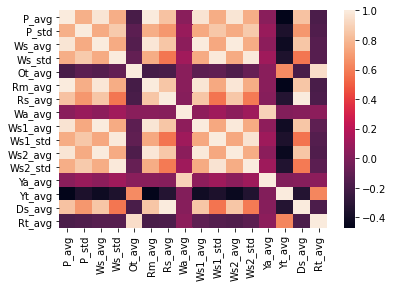

In [111]:
sns.heatmap(corr)

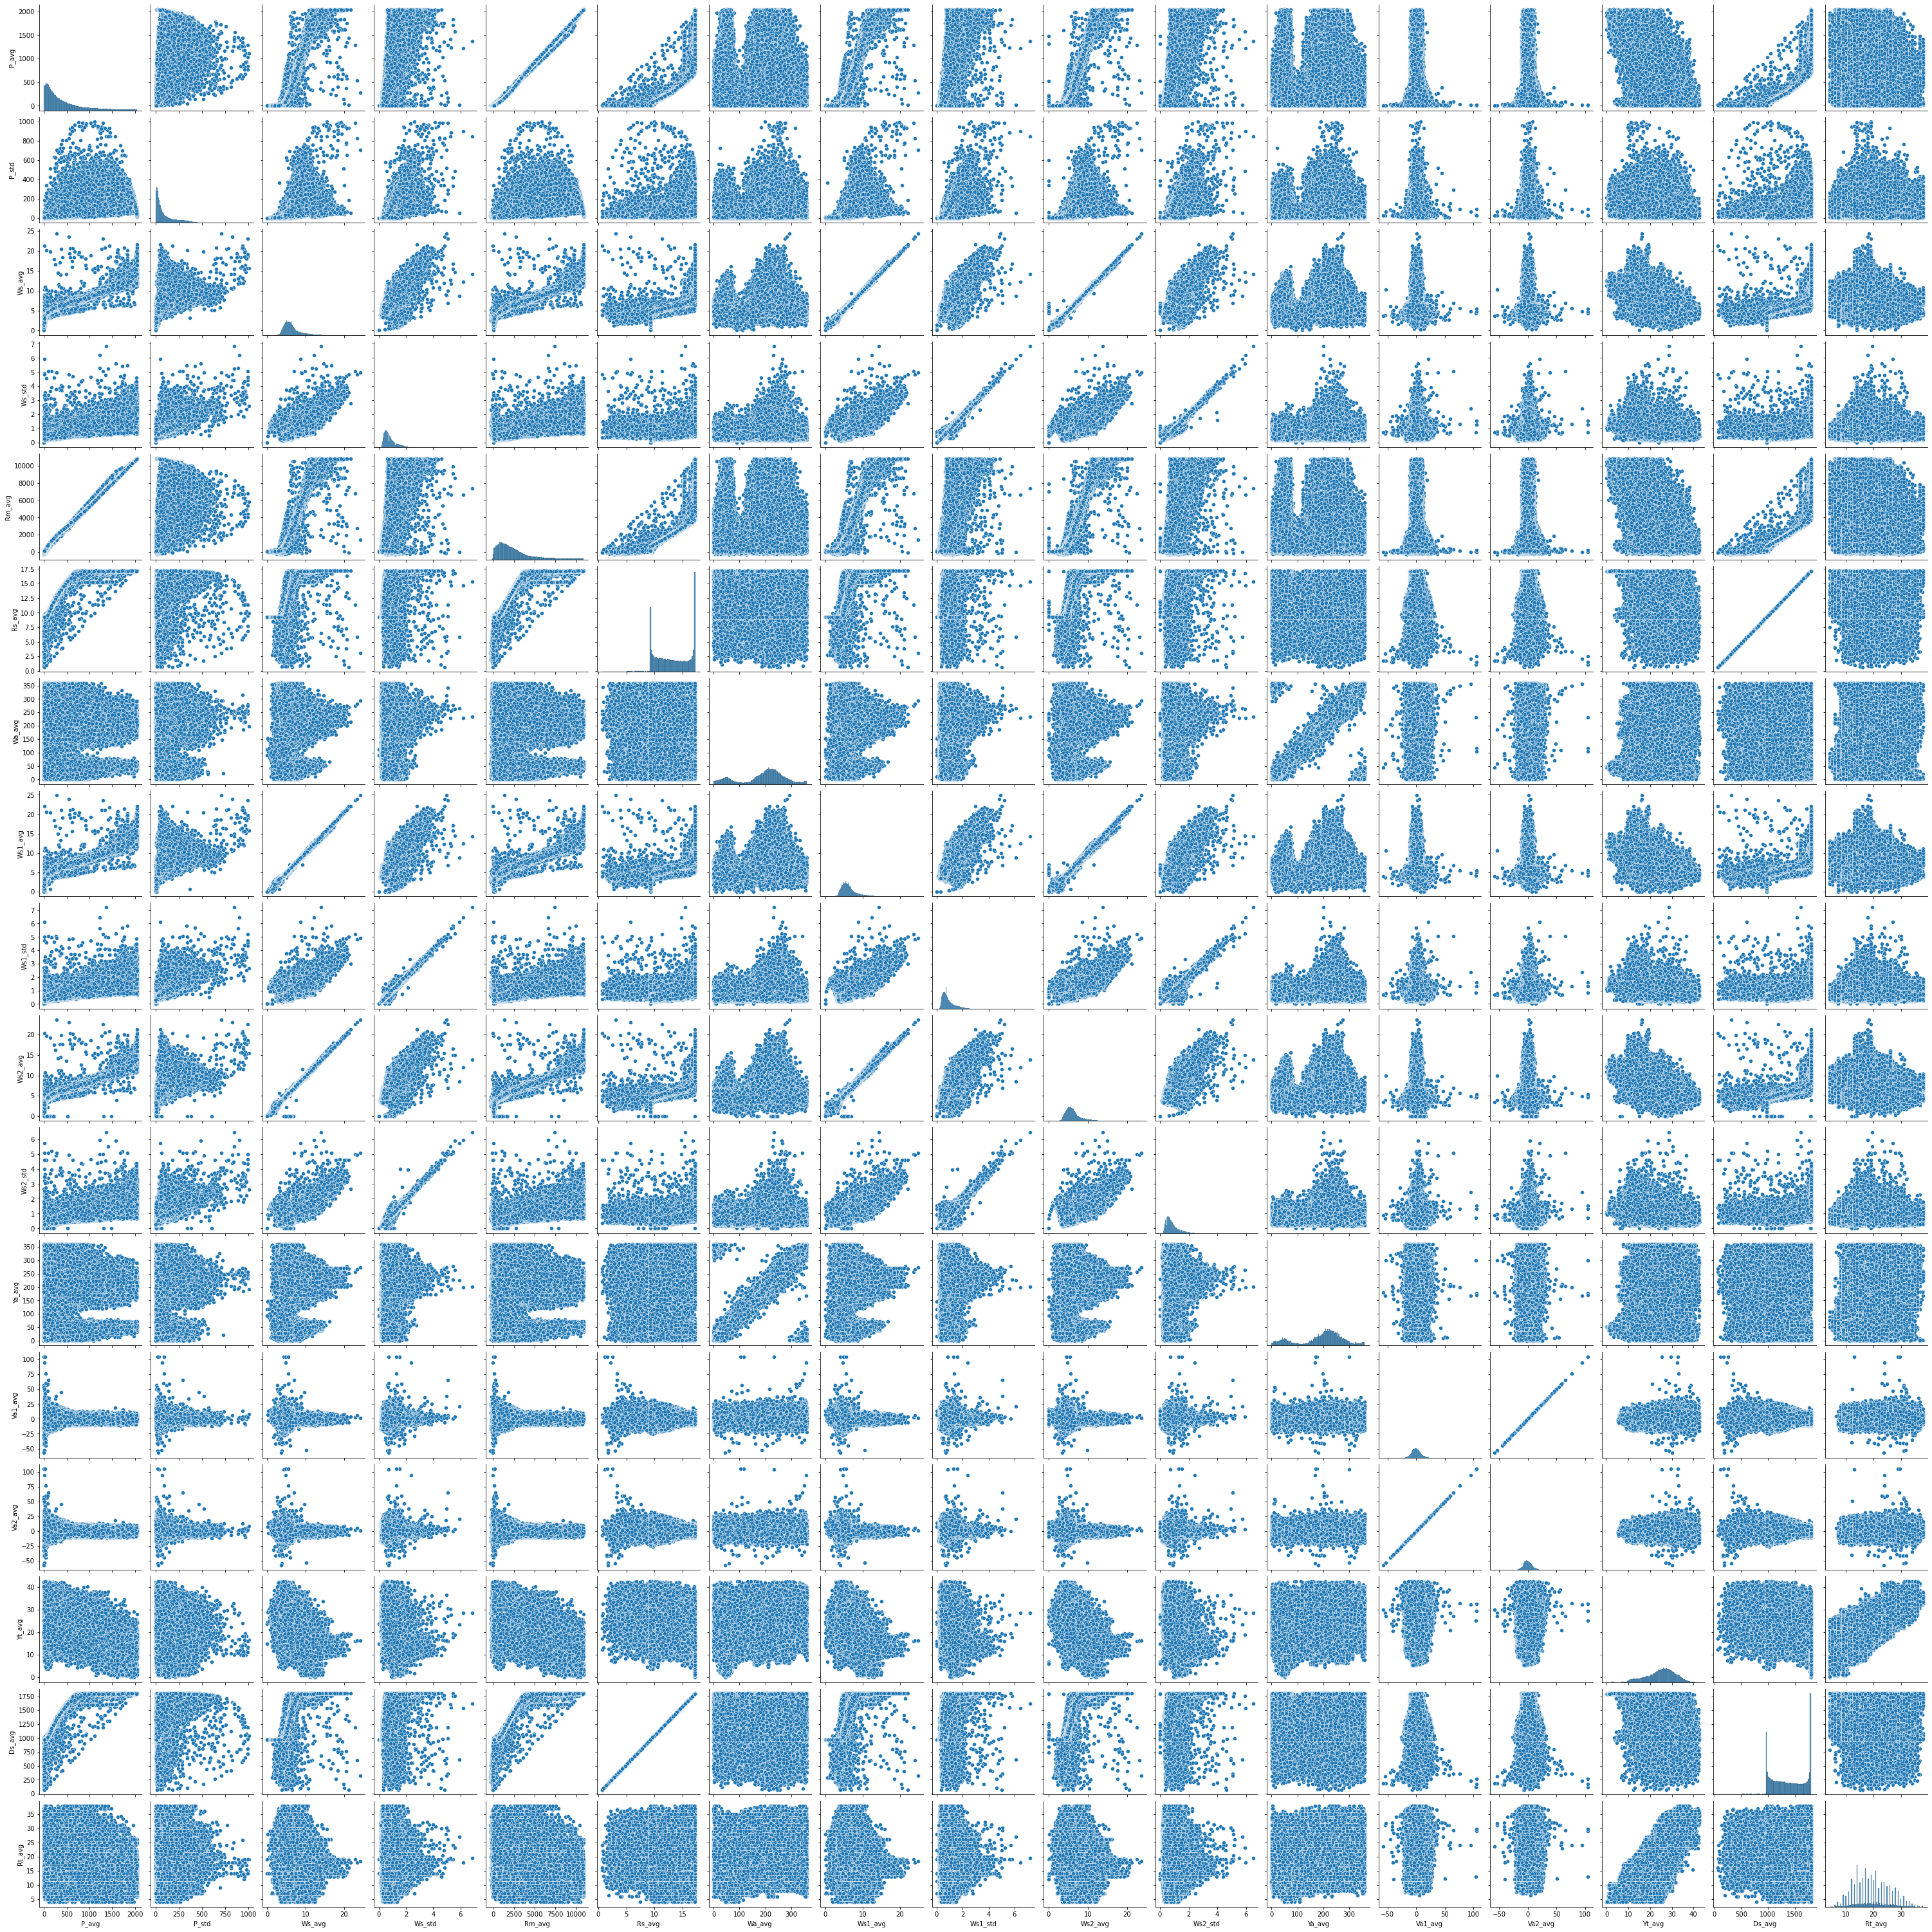

In [46]:
sns.pairplot(df1_pf)

In [113]:
prof = ProfileReport(df1_pfc)
prof.to_file(output_file='output1.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Wind_turbine_name
R80711    AxesSubplot(0.125,0.125;0.775x0.755)
R80721    AxesSubplot(0.125,0.125;0.775x0.755)
R80736    AxesSubplot(0.125,0.125;0.775x0.755)
R80790    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

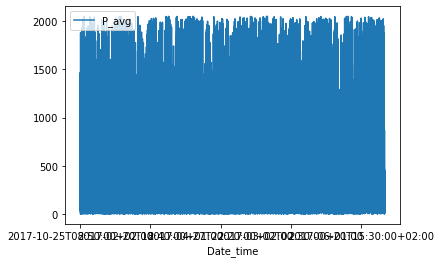

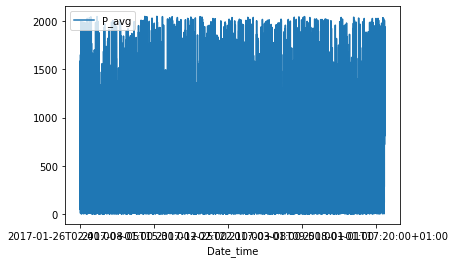

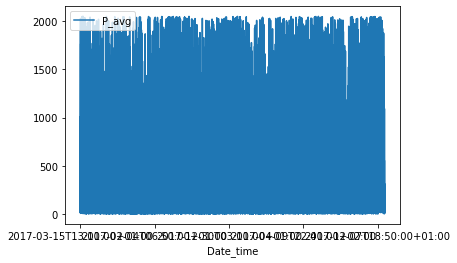

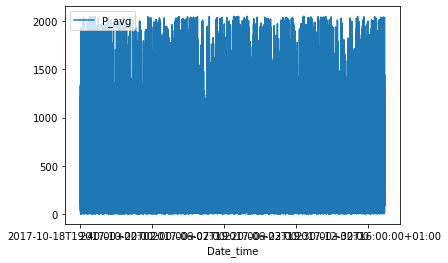

In [75]:
df1_pfc.groupby('Wind_turbine_name').plot('Date_time', 'P_avg')

In [207]:
X_train = (df1_train[["Ws_avg","Ws_std","Ot_avg","Rs_avg",
           "Wa_avg","Ws1_avg","Ws1_std","Ws2_avg","Ws2_std",
           "Ya_avg"]])
y_train =  df1_train["P_avg"]

In [208]:
X_test = (df1_test[["Ws_avg","Ws_std","Ot_avg","Rs_avg",
           "Wa_avg","Ws1_avg","Ws1_std","Ws2_avg","Ws2_std",
           "Ya_avg"]])
y_test =  df1_test["P_avg"]

In [301]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 5)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [15, 20]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [5, 10]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [210]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(n_estimators=50,max_depth=30,min_samples_split=15,min_samples_leaf=5,random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=5, min_samples_split=15,
                      n_estimators=50, random_state=42)

In [212]:
y_predict = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_predict - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'KW.')

Mean Absolute Error: 10.76 KW.


In [304]:
r2_RF = metrics.r2_score(y_test, y_predict).round(3)
print('R2 score is {}'.format(r2_RF) )

R2 score is 0.997


In [213]:
rf.feature_importances_

array([6.92459368e-01, 1.18213149e-03, 1.44246351e-03, 3.02394871e-01,
       1.65107243e-04, 5.77759659e-04, 6.01501546e-04, 6.56712577e-04,
       3.28816300e-04, 1.91268266e-04])

Ws_avg     0.692459
Rs_avg     0.302395
Ot_avg     0.001442
Ws_std     0.001182
Ws2_avg    0.000657
Ws1_std    0.000602
Ws1_avg    0.000578
Ws2_std    0.000329
Ya_avg     0.000191
Wa_avg     0.000165
dtype: float64


Text(0.5, 1.0, 'Visualizing Important Features')

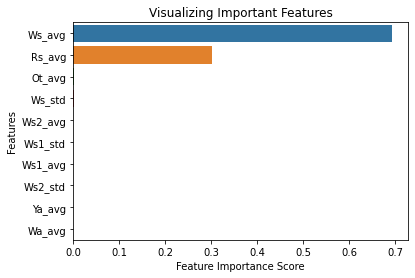

In [214]:
#plt.barh(X_test.columns, rf.feature_importances_)
feature_imp = pd.Series(rf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
print (feature_imp)

# Plot feature ranking in the form of bar chart

sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

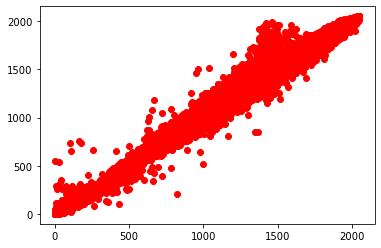

In [218]:
plt.plot(y_test,y_predict,'ro')

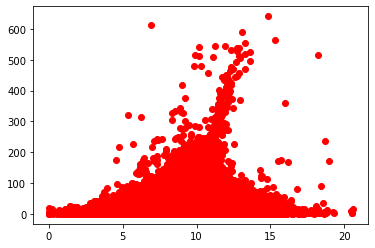

In [219]:
#plt.yscale("log")
plt.plot(X_test["Ws_avg"],errors,'ro')

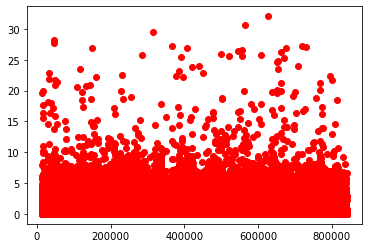

In [220]:
errors1=errors*100/2000
plt.plot(errors1,'ro')

In [221]:
np.mean(errors)*100/2000

0.537826314562378

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd1bf8299a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd1bf829f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd1bf829550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd1bf767fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1bf767430>],
 'means': []}

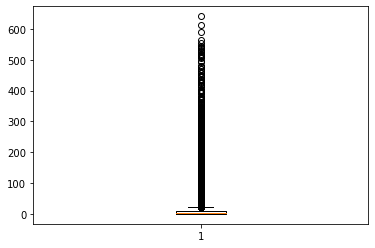

In [305]:
plt.boxplot(errors)

In [222]:
errors.describe()

count    166614.000000
mean         10.756526
std          23.427280
min           0.000005
25%           0.906590
50%           2.705842
75%           9.083025
max         641.495752
Name: P_avg, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


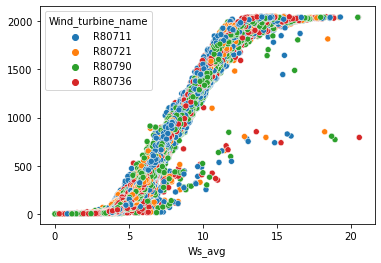

In [223]:
sns.scatterplot(X_test["Ws_avg"], y_predict, hue=df1_test["Wind_turbine_name"])

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


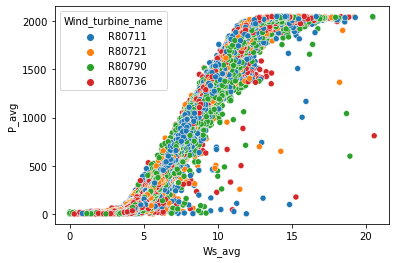

In [224]:
sns.scatterplot(X_test["Ws_avg"], y_test, hue=df1_test["Wind_turbine_name"])

plt.show()

In [231]:
from sklearn.ensemble import GradientBoostingRegressor
# Set lower and upper quantile

In [306]:
alpha = 0.95

gb_model = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

gb_model.fit(X_train, y_train)

# Make the prediction on the upper quantile
y_upper = gb_model.predict(X_test)

# Make the prediction on the lower quantile

gb_model.set_params(alpha=1.0 - alpha)
gb_model.fit(X_train, y_train)
y_lower = gb_model.predict(X_test)

# Make the prediction on the deafult loss (mid model)

gb_model.set_params(loss='ls')
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

In [307]:
y_test1=y_test[-1000:]
y_pred1 =y_pred[-1000:]
y_upper1 =y_upper[-1000:]
y_lower1 =y_lower[-1000:]
X1= X_test["Ws_avg"]
X2=X1[-1000:]

In [308]:
X2.shape

(200,)

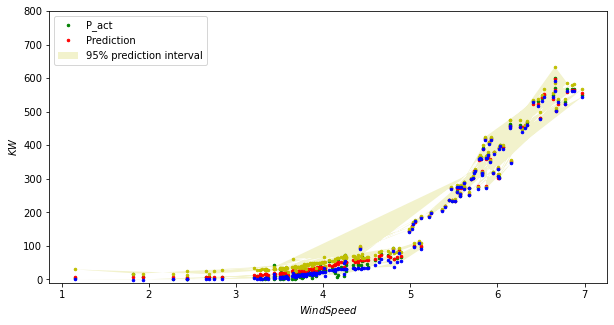

In [340]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
fig.set_size_inches(10, 5)
plt.plot(X2,y_test1, 'g.', markersize=5, label=u'P_act')
plt.plot(X2,y_pred1, 'r.',markersize=5, label=u'Prediction')
plt.plot(X2, y_upper1, 'y.',markersize=5)
plt.plot(X2, y_lower1, 'b.',markersize=5)
# plt.fill(np.concatenate([X2, X2[::-1]]),
#          np.concatenate([y_upper1, y_lower1[::-1]]),
#          alpha=.5, fc='b', ec='None', label='95% prediction interval')
#plt.fill((y_upper1, y_lower1),alpha=.5, fc='b', ec='None')

plt.fill(np.concatenate([X2, X2]),
         np.concatenate([y_upper1, y_lower1]),
         alpha=.2, fc='y', ec='None', label='95% prediction interval')
plt.xlabel('$Wind Speed$')
plt.ylabel('$KW$')
plt.ylim(-10, 800)
plt.legend(loc='upper left')
plt.show()

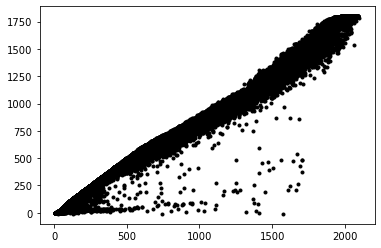

In [310]:
plt.plot(y_upper,y_lower, 'k.')

In [311]:
y_predict_gb = gb_model.predict(X_test)
# Calculate the absolute errors
errors_gb = abs(y_predict_gb - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_gb), 2), 'KW.')

Mean Absolute Error: 13.54 KW.


In [312]:
r2 = metrics.r2_score(y_test, y_predict_gb).round(3)
print('R2 score is {}'.format(r2) )

R2 score is 0.995


Text(0.5, 1.0, 'Feature Importance (MDI)')

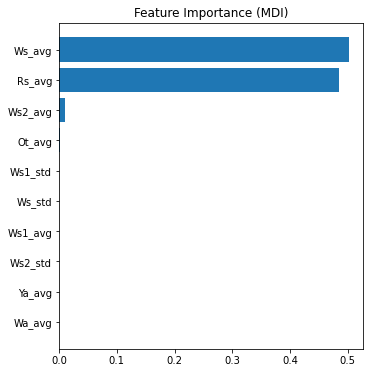

In [313]:
feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_test.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")